<a href="https://colab.research.google.com/github/JacobTumak/SentimentAnalysisProject/blob/main/Sentiment_Analysis_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing/Installing Packages**

In [1]:
import json
from collections import Counter
import numpy as np
import nltk
from nltk import (sent_tokenize, word_tokenize)
from nltk.corpus import stopwords
nltk.download(['punkt', 'stopwords'])
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

stop_words.add('br')
# 'br' appears most in text later on as a break operator.
# Adding it to the stopwords list now will prevent it from 
# becoming the most seen 'word' later on.

# **Importing DataSets from google Drive**

Read the file taken from drive into a list of reviews. Drive must be mounted into the same drive account that colab is using or else it won't mount.

In [3]:
from google.colab import drive # Must use same account as the notebook is in, otherwise it won't mount
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import os

def fetch_dataV2(identifier):
  text = list()
  directory = f"/content/gdrive/My Drive/Train/{identifier}"
  for file_name in os.listdir(directory):
      if file_name.endswith(".txt"):
          file_path = os.path.join(directory, file_name)
          with open(file_path, "r") as f:
              text.append(f.read())
          if len(text)>1000:
            break
  return text

compile first 1000 positive and negative reviews into their respective lists. Just for testing. Final trial will have more reviews loaded

In [5]:
neg_reviews = fetch_dataV2('neg')
pos_reviews = fetch_dataV2('pos')

# **Training data preparation**

---



In [6]:
from nltk.stem import PorterStemmer
from nltk.util import ngrams
ps = PorterStemmer()
from collections import Counter
import string
from pprint import pprint

In [7]:
def remove_dups(w_lst):
  return list(dict.fromkeys(w_lst))

In [59]:
def process_data(reviews, n_words=1):
  all_words = list()
  word_count = []
  rev_obj = list()
  for list_obj in reviews:
    for review in list_obj[1]:
      words = word_tokenize(review.lower())
      words = [ps.stem(word) for word in words if word not in stop_words and word not in string.punctuation]
      if n_words > 1:
        words = n_grams(words, n_words)
      word_count.extend(words)
      words = remove_dups(words)
      rev_obj.append([list_obj[0], words])
  word_count = dict(Counter(word_count))
  all_words = {word: word_count[word] for word in word_count if word_count[word]>100}
  return {'word data':dict(sorted(all_words.items(), key=lambda x:x[1], reverse=True)), 'review data':rev_obj}

In [9]:
def get_input_array(data, test_data=None, request='train'):
  rule = list(data['word data'].keys())
  y_vals = np.array([])
  array_size = len(rule)
  array_2d = np.zeros(array_size, dtype=np.int8)
  rev_objects = data['review data']

  if test_data != None:
    rev_objects = test_data['review data']

  for rev_obj in rev_objects:
    line = np.zeros(array_size, dtype=np.int8)
    y_vals = np.append(y_vals, rev_obj[0])
    for i in range(array_size):
      if rule[i] in rev_obj[1]:
        line[i] = 1
    array_2d = np.vstack([array_2d, line])
  return (y_vals.astype(int), array_2d[1:].astype(int))

In [60]:
train_data = process_data([[1, pos_reviews],[0, neg_reviews]])

In [61]:
len(train_data['word data'])

450

In [62]:
yx_vals = get_input_array(train_data)
y_vals = yx_vals[0]
x_vals = yx_vals[1]

In [63]:
lr_trial = LogisticRegression()
lr_trial.fit(x_vals, y_vals)

#**Word Use Analysis**

In [78]:
def remove_outliers(reviews, min_percent=0.001, max_percent=0.001):
    if max_percent == False:
      max_percent = 1
    if min_percent == False:
      min_percent = 0

    word_data = reviews['word data']
    num_words = len(word_data)
    return {word: word_data[word] for word in word_data if word_data[word] / num_words > min_percent and word_data[word] / num_words < max_percent}

In [40]:
def get_word_stats(word_data):
  stat_keys = dict()
  stats = {value: 0 for value in word_data.values()}
  for word in word_data:
    stats[word_data[word]] += 1
    stat_keys.update({word: word_data[word]})
  return {'stats':stats,'stat keys': stat_keys}

The output structure of "get_word_stats":

Keys are the frequency of use for a word

Values are the amount of words that have that frequency

for ex; {8:331} means that there are 331 words that appear 8 times

In [15]:
relative_high = max(train_data['word data'].values()) / len(train_data['word data'])
rank = sorted([(train_data['word data'][word]/len(train_data['word data']))/relative_high for word in train_data['word data']], reverse=True)

In [41]:
stats = get_word_stats(train_data['word data'])
stat_keys =stats['stat keys']
stats = stats['stats']

In [42]:
stat_keys

{"'s": 5225,
 'movi': 3962,
 'film': 3805,
 "''": 2690,
 '``': 2686,
 "n't": 2612,
 'one': 2151,
 'like': 1729,
 'time': 1284,
 'good': 1240,
 'charact': 1185,
 'make': 1181,
 'get': 1148,
 'see': 1117,
 'watch': 1099,
 'would': 1047,
 'stori': 1027,
 'even': 985,
 'well': 947,
 'realli': 939,
 'scene': 842,
 '...': 842,
 'much': 796,
 'look': 796,
 'show': 780,
 'great': 773,
 'end': 750,
 'bad': 742,
 'first': 738,
 'act': 736,
 'also': 728,
 'think': 711,
 'way': 710,
 'could': 705,
 'go': 702,
 'play': 685,
 'seem': 648,
 'made': 647,
 'peopl': 647,
 'thing': 635,
 'love': 632,
 'say': 612,
 'know': 607,
 'take': 571,
 'work': 562,
 'seen': 557,
 'plot': 554,
 'come': 547,
 'tri': 538,
 'want': 535,
 'actor': 534,
 'never': 531,
 'best': 530,
 'littl': 519,
 'mani': 518,
 'year': 517,
 'two': 499,
 'life': 485,
 'still': 485,
 'better': 477,
 'find': 472,
 'man': 464,
 'give': 454,
 'ever': 449,
 'perform': 440,
 'part': 427,
 'actual': 421,
 'horror': 416,
 'interest': 406,
 "'ve"

In [47]:
valid_words = list()
[valid_words.extend([word for word in stat_keys if stat_keys[word]==item]) for item in stats if item > 20 and stats[item]> 20]
print(len(valid_words))
print(len(train_data['word data']))

931
21326


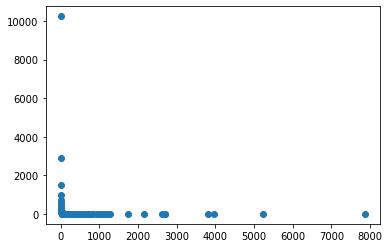

In [134]:
import matplotlib.pyplot as plt
plt.scatter(stats.keys(), stats.values())
plt.show()

# **Making The Sentiment Analysis Class**

In [ ]:
len(x_vals) == len(y_vals)

In [ ]:
lr_trial = LogisticRegression()
lr_trial.fit(x_vals, y_vals)

In [ ]:
test_data = process_data([[1, pos_reviews[10:20]],[0, neg_reviews[10:20]]])
yx_vals = get_input_array(data, test_data=test_data)

In [ ]:
lr_trial

In [11]:
# This class was made and annotated by Chat-GPT.
# I wanted to use it to learn what goes into a logistic regression algorithm to understand it better.
#List modifications:

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):

        self.lr = lr                    # learning rate
        self.num_iter = num_iter        # number of iterations
        self.fit_intercept = fit_intercept  # whether or not to fit an intercept term
        self.verbose = verbose          # whether or not to print out training progress
        
    def __add_intercept(self, X):
        """ Adds an intercept term to a feature matrix X """
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        """ Sigmoid function """
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        """ Logistic loss function """
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        """ Fits the logistic regression model using gradient descent """
        
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        # gradient descent loop
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y)} \t')

    def predict_prob(self, X):
        """ Predicts class probabilities for input data """
        
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        """ Predicts binary classes for input data using a threshold """
        
        return self.predict_prob(X) >= threshold